# Titanic Decision Tree – Model Answer

In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

## Load and preprocess the dataset

In [ ]:
# Load the data
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Check the column types
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Drop the 'Cabin' column, as it's not needed for analysis. You can also drop other columns as necessary.
titanic_df.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)


### One-Hot Encoding
One-hot encoding is a technique used to transform categorical variables into a numerical format, making them suitable for machine learning algorithms. It works by creating new binary columns for each unique category in the original variable, where each column represents one possible category. This way, the categorical data is converted into a format that algorithms can easily process without assuming any inherent order or priority between the categories. For instance, in the 'Sex' column, which contains categories such as 'male' and 'female', one-hot encoding would generate two new columns, one for each category, with a binary value of 1 or 0 to indicate the presence of that category for each record.

In [ ]:
# Return unique values from the Sex column
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine learning classifiers are unable to handle string values directly, so categorical data must be converted into a numerical form. There are two primary methods for doing this:

1. **Label Encoding**: This technique assigns a unique integer to each category, such as 0 for 'male' and 1 for 'female'. However, this approach introduces a problem—by using numbers, it suggests a ranking or order between the categories, which can confuse some machine learning models into thinking one category is inherently 'greater' than the other.

2. **One-Hot Encoding**: This method avoids the issue of implied order by creating separate binary columns for each category. For example, instead of assigning numbers to 'male' and 'female', one-hot encoding creates two new columns—`Sex_male` and `Sex_female`. If a person is `male`, there will be a 1 in the `Sex_male` column and a 0 in the `Sex_female` column, and vice versa for females. This method ensures each category is treated independently, without any implied hierarchy.

In pandas, a straightforward way to perform one-hot encoding is by using the `get_dummies()` function, which automatically generates these binary columns for categorical variables in your dataset.

In [ ]:
# Apply one-hot encoding to the 'Sex' column
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,22.0,1,0,7.2500,S,0,1
1,2,1,1,38.0,1,0,71.2833,C,1,0
2,3,1,3,26.0,0,0,7.9250,S,1,0
3,4,1,1,35.0,1,0,53.1000,S,1,0
4,5,0,3,35.0,0,0,8.0500,S,0,1


Now, we do the same to the "Embarked" column.

In [ ]:
# Apply one-hot encoding to the 'Embarked' column
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [ ]:
# Print information about the DataFrame
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Sex_female   891 non-null    uint8  
 8   Sex_male     891 non-null    uint8  
 9   Embarked_C   891 non-null    uint8  
 10  Embarked_Q   891 non-null    uint8  
 11  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(5)
memory usage: 53.2 KB


In [ ]:
# Count the number of NaNs in each column to identify missing values
nan_counts = titanic_df.isna().sum()

print(nan_counts)

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
Sex_female       0
Sex_male         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64


In [ ]:
# Fill missing values in the Age column
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)

In [ ]:
# Select relevant variables and target
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
target = 'Survived'

## Build a decision tree

In [ ]:
# Split the data into training, development, and test sets
X_train_dev, X_test, y_train_dev, y_test = train_test_split(titanic_df[features], titanic_df[target], test_size=0.2, random_state=42)
X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, test_size=0.25, random_state=42)

In [ ]:
# Initialise the Decision Tree Classifier without any restrictions
tree_clf = DecisionTreeClassifier(random_state=42)

# Train the model using the training set
tree_clf.fit(X_train, y_train)

In [ ]:
# Plot the decision tree
plt.figure(figsize=(20, 10))  # Adjust figure size as needed
plot_tree(tree_clf, feature_names=features, filled=True, rounded=True, class_names=['Died', 'Survived'])
plt.show()


In [ ]:
# Evaluate model accuracy on the development set
dev_accuracy = tree_clf.score(X_dev, y_dev)
print(f"Development Set Accuracy: {dev_accuracy:.2f}")


In [ ]:
# Initialise lists to store accuracies
train_accuracies = []
dev_accuracies = []

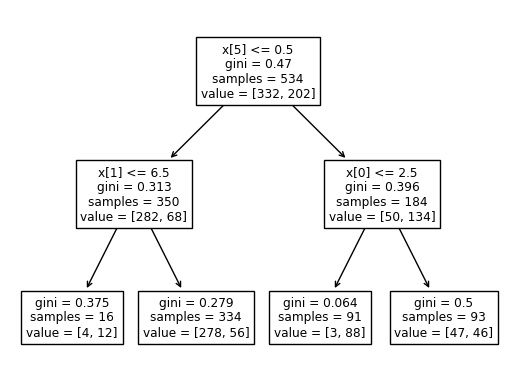

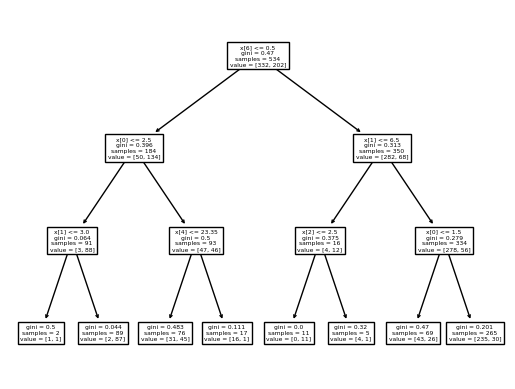

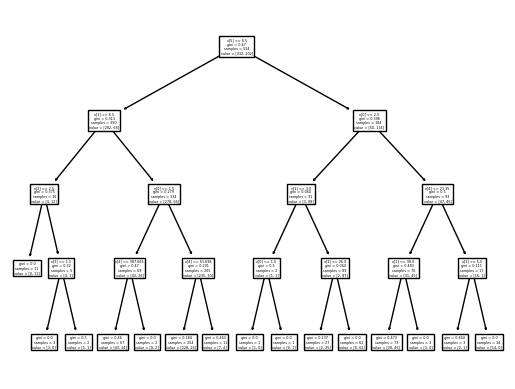

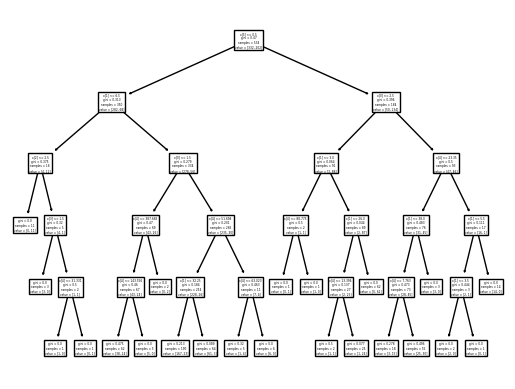

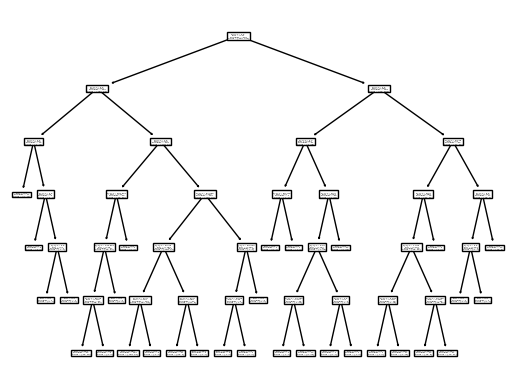

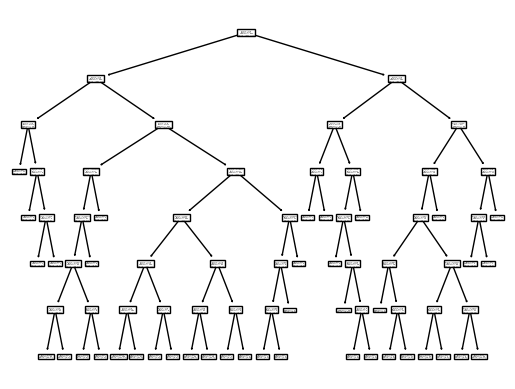

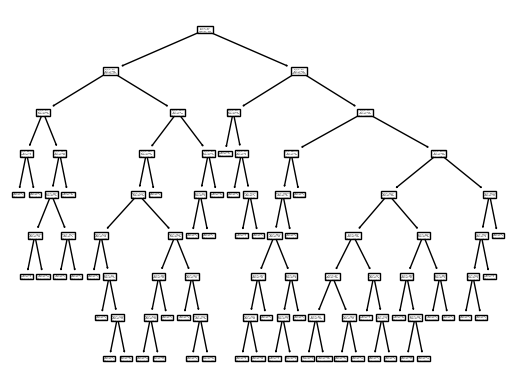

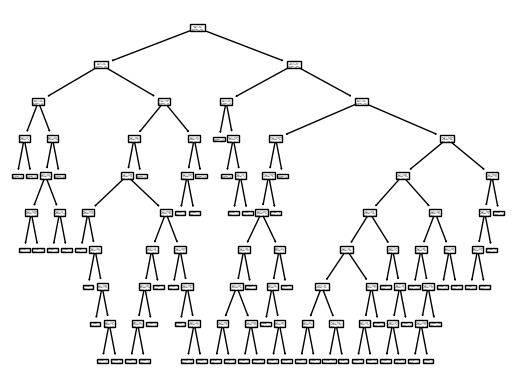

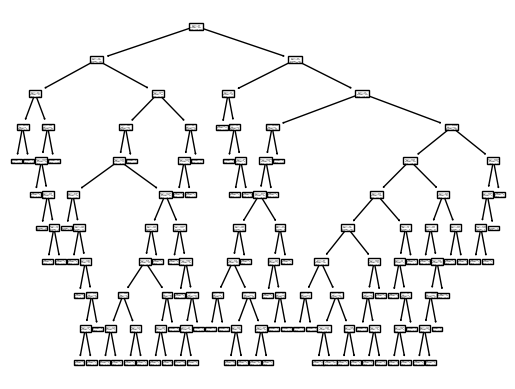

In [ ]:
# Loop over different values of max_depth
for max_depth in range(2, 11):
    # Train a decision tree
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)

    # Compute accuracies and store them
    train_accuracies.append(accuracy_score(y_train, clf.predict(X_train)))
    dev_accuracies.append(accuracy_score(y_dev, clf.predict(X_dev)))

    # Plot the tree
    tree.plot_tree(clf)
    plt.show()

## Evaluate model performance

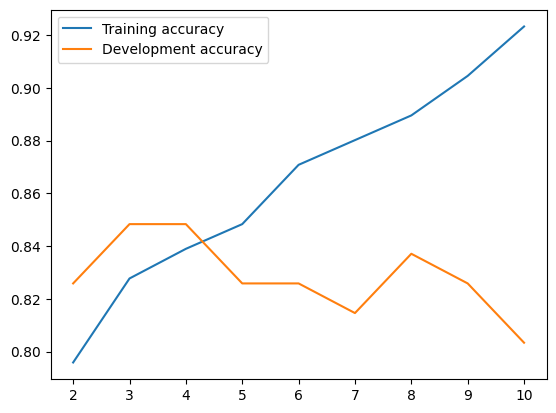

In [ ]:
# Plot training and development accuracies
plt.plot(range(2, 11), train_accuracies, label='Training accuracy')
plt.plot(range(2, 11), dev_accuracies, label='Development accuracy')
plt.legend()
plt.show()


In [ ]:
# Find the max_depth that gives the highest accuracy on the development set
best_max_depth = dev_accuracies.index(max(dev_accuracies)) + 2

# Train final model on combined training and development data, and report accuracy on test data
clf_final = DecisionTreeClassifier(max_depth=best_max_depth)
clf_final.fit(pd.concat([X_train, X_dev]), pd.concat([y_train, y_dev]))
print('Test accuracy:', accuracy_score(y_test, clf_final.predict(X_test)))

Test accuracy: 0.7988826815642458


The blue line representing training accuracy displays an upward trend, indicating that the model becomes increasingly accurate on the training data as the `max_depth` increases. This behaviour is expected because a deeper tree allows the model to capture more complexity in the training data.

The orange line, representing validation (or development) accuracy, reaches a peak around a `max_depth` of 3 or 4, after which it fluctuates. This suggests that the model's ability to generalise to new data improves up to a certain point (the peak) but then begins to decline. This pattern is common in machine learning and indicates overfitting. When the model becomes too complex (i.e., when the tree is excessively deep), it starts to fit the noise present in the training data, which negatively impacts its performance on unseen data.

In summary, the shapes of the lines suggest there is an optimal range for the `max_depth` parameter where the model strikes a balance between underfitting and overfitting, typically around 3 or 4. This is where validation accuracy is maximised. Beyond this point, increasing `max_depth` results in overfitting, causing the model to excel on the training data but perform poorly on new, unseen data.

In [ ]:
# Now I want to see the data of the max_depth to confirm the visualisation
for depth, accuracy in enumerate(dev_accuracies, start=2):
    print(f"Max depth: {depth}, Development accuracy: {accuracy}")

Max depth: 2, Development accuracy: 0.8258426966292135
Max depth: 3, Development accuracy: 0.848314606741573
Max depth: 4, Development accuracy: 0.848314606741573
Max depth: 5, Development accuracy: 0.8258426966292135
Max depth: 6, Development accuracy: 0.8258426966292135
Max depth: 7, Development accuracy: 0.8146067415730337
Max depth: 8, Development accuracy: 0.8370786516853933
Max depth: 9, Development accuracy: 0.8258426966292135
Max depth: 10, Development accuracy: 0.8033707865168539


Based on the above development accuracies, the “sweet spot” for the `max_depth` parameter of the model is 3 or 4, where the development accuracy reaches its peak value of 0.848314606741573 (or about 84.83%).

This means that a decision tree of depth 3 or 4 gives the best performance on the development set among the depths tried. Beyond this point, increasing `max_depth` does not improve performance on the development set, and can even lead to a decrease in performance due to overfitting.